In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [60]:
attendance = pd.read_csv('./Data Files/Clean Attendance Payroll and Year.csv')
population = pd.read_csv('./Data Files/2010 CSA Population by Team.csv')

In [61]:
attendance = attendance.groupby('Tm')
attendance = attendance.mean()
attendance = attendance[['Attend/G']]

In [62]:
population.columns = ['Tm','pop']

In [63]:
combined = population.merge(attendance, on = 'Tm')

In [64]:
attendance = []
population = []

attendance.append(combined['Attend/G'])
population.append(combined['pop'])

population = population[0]
attendance = pd.to_numeric(attendance[0])

In [65]:
print(population.head())
print(attendance.head())

correlation = attendance.corr(population)
correlation

0    5584216
1    8495509
2    5480873
3    9686021
4    9686021
Name: pop, dtype: int64
0    29664.181818
1    25986.090909
2    36791.545455
3    37367.454545
4    26351.272727
Name: Attend/G, dtype: float64


0.5474817186055613

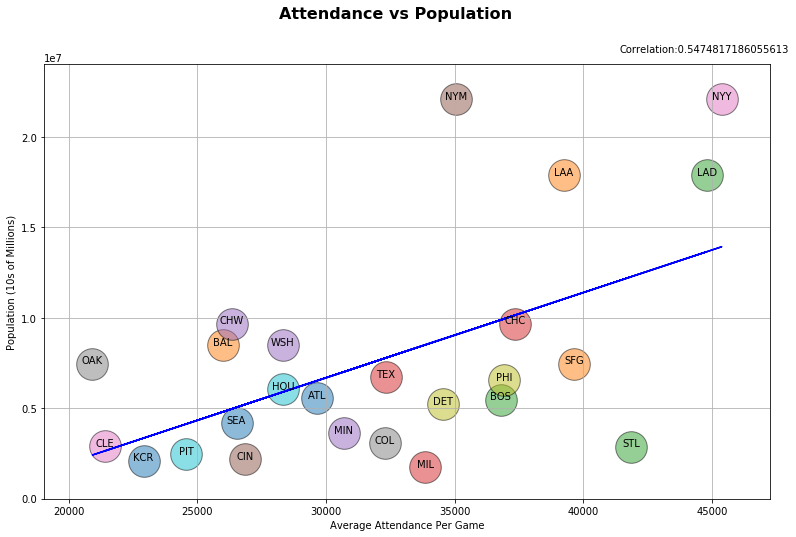

In [66]:
# Plot data
x = [x for x in attendance]
y = [y for y in population]
teams = [team for team in combined['Tm']]

grouped = pd.DataFrame(dict(x=x,y=y,teams=teams))

fig, ax = plt.subplots(facecolor ='w', figsize=(13,8))

for key, row in grouped.iterrows():
    ax.scatter(row['x'], row['y'],alpha = 0.5, s=1000, edgecolors = 'black')
    ax.annotate(row['teams'],ha='center',xy = (row['x'], row['y']))

(slope, intercept, _, _, _) = linregress(attendance, population)
fit = slope * attendance + intercept
ax.plot(attendance, fit, 'b')

plt.figtext(.74,.9,(f"Correlation:{correlation}"))
plt.grid(True)
fig.suptitle("Attendance vs Population", fontsize=16, fontweight="bold")
ax.set_xlabel('Average Attendance Per Game')
ax.set_ylabel('Population (10s of Millions)')
plt.savefig('./Images/Attendance vs Population')

In [50]:
population

0      5584216
1      5119510
2      5480873
3      9686021
4      9686021
5      2172191
6      2881937
7      3090874
8      5218852
9      6051363
10     2104853
11    17877006
12    17877006
13     1751316
14     3615902
15    22085649
16    22085649
17     7468390
18     6533683
19     2447393
20     4199312
21     7468390
22     2878255
23     6731317
24      601723
Name: pop, dtype: int64